In [2]:
print("ram")

ram


In [3]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
metro_data=pd.read_csv("C:\\Users\\prash\\Downloads\\Delhi-Metro-Network.csv")
print(metro_data)

     Station ID           Station Name  Distance from Start (km)  \
0             1               Jhil Mil                      10.3   
1             2    Welcome [Conn: Red]                      46.8   
2             3            DLF Phase 3                      10.0   
3             4             Okhla NSIC                      23.8   
4             5             Dwarka Mor                      10.2   
..          ...                    ...                       ...   
280         281             Bata Chowk                      38.3   
281         282       Dwarka Sector 12                       5.8   
282         283        Noida Sector 18                      43.6   
283         284      Knowledge Park II                      21.4   
284         285  Mayur Vihar Extention                      39.5   

             Line Opening Date Station Layout   Latitude  Longitude  
0        Red line   2008-04-06       Elevated  28.675790  77.312390  
1       Pink line   2018-10-31       Elevat

In [4]:
# Now, let’s have a look at whether the dataset has any null values or not and then look at the data types

missing_values= metro_data.isnull().sum()
d_type=metro_data.dtypes
missing_values
# d_type


Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [5]:
# convert Opening Date to  dateTime formate
metro_data['Opening Date']=pd.to_datetime(metro_data['Opening Date'])
metro_data

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


# Now i will visualiZe the locations of the metro station on a map . 
# we will use the lat. , long. data to plot. use of folium library.

In [6]:
# color scheme for the metro line
import folium.map
line_colors = {
    'Red line': 'blue',
    'Blue line': 'red',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}
delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)
# add color marker
for index, row in metro_data.iterrows():
    line= row['Line']
    color = line_colors.get(line, 'black')
    folium.Marker(
        location= [row['Latitude'], row['Longitude']],
        popup=f'{row['Station Name']}',
        tooltip=f'{row['Station Name']},aao kabi',
        icon=folium.Icon(color=color)
    ). add_to(delhi_map)

delhi_map


# their we can analyze the growth of the delhi metro network over time
# I can  start by extracting the year from the opening date and then count the number of stations. 

In [7]:
metro_data['Opening Year']= metro_data['Opening Date'].dt.year
metro_data

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Opening Year
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390,2008
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560,2018
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500,2013
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849,2017
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260,2005
...,...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462,2015
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510,2006
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120,2009
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054,2019


In [8]:
stations_per_year= metro_data['Opening Year'].value_counts().sort_index()
stations_per_year

Opening Year
2002     6
2003     4
2004    11
2005    28
2006     9
2008     3
2009    17
2010    54
2011    13
2013     5
2014     3
2015    13
2017    18
2018    64
2019    37
Name: count, dtype: int64

C:\Users\prash\AppData\Local\Temp\ipykernel_5816\4268766290.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stations_per_year.index, y=stations_per_year.values, palette='viridis')


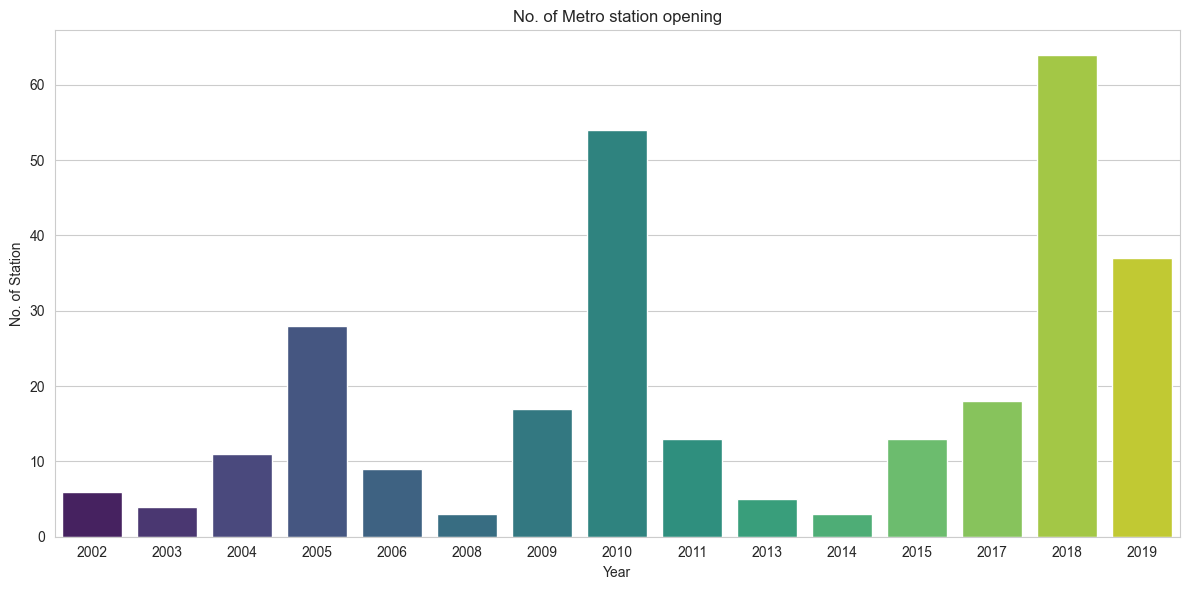

In [9]:
sns.set_style("whitegrid")
metro_data['Opening Year']= metro_data['Opening Date'].dt.year

# count the number of stations opened each yr
stations_per_year= metro_data['Opening Year'].value_counts().sort_index()
# stations_per_year_df = stations_per_year.reset_index()
# stations_per_year_df.columns = ['Year', 'Number of Stations']


plt.figure(figsize=(12,6))
sns.barplot(x=stations_per_year.index, y=stations_per_year.values, palette='viridis')
plt.title('No. of Metro station opening')
plt.xlabel('Year')
plt.ylabel('No. of Station')
plt.tight_layout()
plt.show()



# Now, I’ll analyze the various metro lines in terms of the number of stations they have and the average distance between stations.
# I’ll calculate the number of stations per line and the average distance between stations on each line.

In [26]:
station_per_line=metro_data['Line'].value_counts()
station_per_line.index

Index(['Blue line', 'Pink line', 'Yellow line', 'Voilet line', 'Red line',
       'Magenta line', 'Aqua line', 'Green line', 'Rapid Metro',
       'Blue line branch', 'Orange line', 'Gray line', 'Green line branch'],
      dtype='object', name='Line')

In [22]:
# calculate total distance of each metro lines max
total_dist_per_line=metro_data.groupby('Line')['Distance from Start (km)'].max()
total_dist_per_line


Line
Aqua line            27.1
Blue line            52.7
Blue line branch      8.1
Gray line             3.9
Green line           24.8
Green line branch     2.1
Magenta line         33.1
Orange line          20.8
Pink line            52.6
Rapid Metro          10.0
Red line             32.7
Voilet line          43.5
Yellow line          45.7
Name: Distance from Start (km), dtype: float64

In [25]:
avg_distance_per_line = total_dist_per_line / (station_per_line  - 1)
avg_distance_per_line

Line
Aqua line            1.355000
Blue line            1.097917
Blue line branch     1.157143
Gray line            1.950000
Green line           1.240000
Green line branch    1.050000
Magenta line         1.379167
Orange line          4.160000
Pink line            1.421622
Rapid Metro          1.000000
Red line             1.167857
Voilet line          1.318182
Yellow line          1.269444
dtype: float64

In [32]:
line_analysis=pd.DataFrame({
  'Line':station_per_line.index,
  'No. of stations':station_per_line.values,
  'avg distance': avg_distance_per_line
})
# sort by no of stations
line_analysis= line_analysis.sort_values(by='No. of stations', ascending=False)
line_analysis.reset_index(drop=True, inplace=True)



,Line,No. of stations,avg distance
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000
5,Magenta line,25,1.050000
6,Aqua line,21,1.379167
7,Green line,21,4.160000
8,Rapid Metro,11,1.421622
9,Blue line branch,8,1.000000


#  I’ll create two plots: one for the number of stations per line and another for the average distance between stations. It will provide a comparative view of the metro lines:

C:\Users\prash\AppData\Local\Temp\ipykernel_5816\4281858424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_analysis['No. of stations'], y= line_analysis['Line'], palette='viridis')


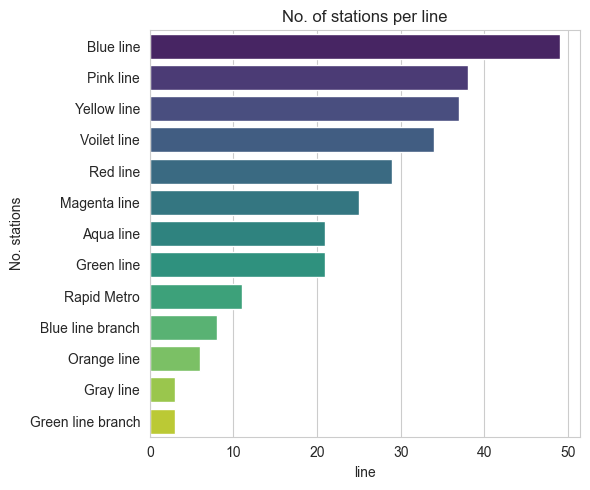

In [43]:
plt.figure(figsize=(6,5))
sns.barplot(x=line_analysis['No. of stations'], y= line_analysis['Line'], palette='viridis')
plt.title('No. of stations per line')
plt.xlabel('line')
plt.ylabel('No. stations')
plt.tight_layout()
plt.show()


C:\Users\prash\AppData\Local\Temp\ipykernel_5816\3783893317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=line_analysis['avg distance'], y=line_analysis['Line'], palette='viridis')


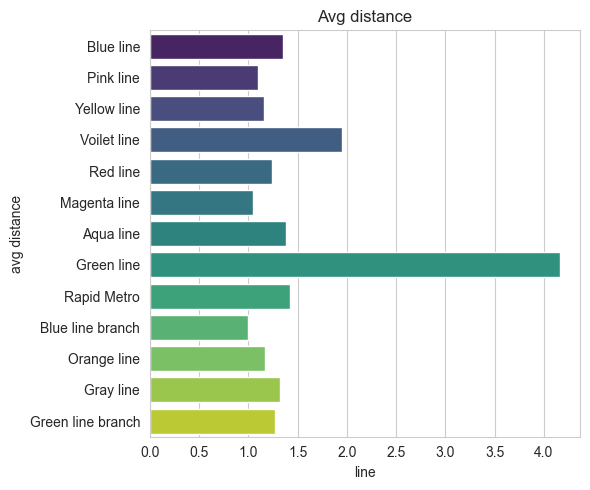

In [41]:
plt.figure(figsize=(6,5))
sns.barplot(x=line_analysis['avg distance'], y=line_analysis['Line'], palette='viridis')
plt.title('Avg distance')
plt.xlabel('line')
plt.ylabel("avg distance")
plt.tight_layout()
plt.show()